<a href="https://colab.research.google.com/github/Deepak-Katchi/ML-works/blob/master/MLP_architectures_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install prettytable

In [0]:
pretty_table = PrettyTable()
pretty_table.field_names = ["Architecture","Hidden Layers","Test Loss", "Test Accuracy"]

In [0]:
from keras.datasets import mnist
import seaborn as sns
from prettytable import PrettyTable
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.utils import np_utils
from keras.initializers import he_normal

In [0]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [0]:
print(X_train.shape,X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [0]:
#Reshaping data
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [0]:
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


In [0]:
#Normalizing data
X_train=X_train/255
X_test=X_test/255

In [0]:
#sample label
print(Y_train[0])

5


In [0]:
#Converting output labels to vectors
Y_train = np_utils.to_categorical(Y_train, 10) 
Y_test = np_utils.to_categorical(Y_test, 10)

In [0]:
#sample label after vectorizing
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
#declaring some parameters
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# Model 1 

# 2 Hidden Layers

# 784 -512- 256 - 10

##784 - 512 (Relu) - 256 (Relu) - 10

In [0]:
# Multilayer perceptron

model_1 = Sequential()
model_1.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_1.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model_1.add(Dense(output_dim, activation='softmax',kernel_initializer=he_normal(seed=None)))

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_50 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2233 - acc: 0.9342 - val_loss: 0.1019 - val_acc: 0.9678
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0811 - acc: 0.9750 - val_loss: 0.0768 - val_acc: 0.9745
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0518 - acc: 0.9838 - val_loss: 0.0737 - val_acc: 0.9761
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.0348 - acc: 0.9889 - val_loss: 0.0773 - val_acc: 0.9769
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0275 - acc: 0.9909 - val_loss: 0.0656 - val_acc: 0.9810
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0208 - acc: 0.9932 - val_loss: 0.0658 - val_acc: 0.9824
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0188 - acc: 0.9938 - val_loss: 0.0757 - val_acc

Test score: 0.09803795478036292
Test accuracy: 0.9819


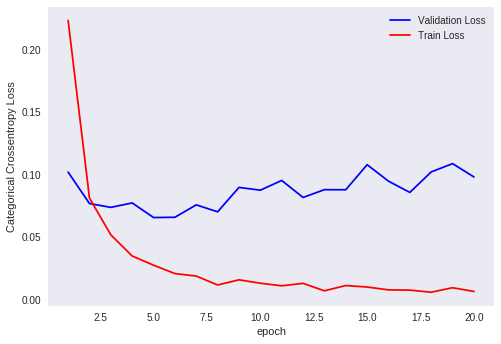

In [0]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
pretty_table.add_row(["784-512-256-10",2,score[0],score[1]])
plt_dynamic(x, vy, ty, ax)

**Observation(s):**

The model is slightly overfitting with the increase in epochs.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


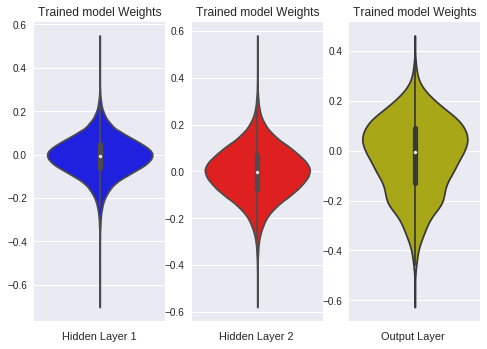

In [0]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batch Normalization 
## 784 - 512(Relu) - BN - 256(Relu) - BN - 10  

In [0]:
# Multilayer perceptron

model_1_batch = Sequential()
model_1_batch.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_1_batch.add(BatchNormalization())
model_1_batch.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model_1_batch.add(BatchNormalization())
model_1_batch.add(Dense(output_dim, activation='softmax',kernel_initializer=he_normal(seed=None)))

model_1_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                2570      
Total params: 538,890
Trainable params: 537,354
Non-trainable params: 1,536
_________________________________________________________________


In [0]:
model_1_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1807 - acc: 0.9459 - val_loss: 0.1083 - val_acc: 0.9680
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0667 - acc: 0.9792 - val_loss: 0.0837 - val_acc: 0.9749
Epoch 3/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0445 - acc: 0.9858 - val_loss: 0.0736 - val_acc: 0.9767
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0325 - acc: 0.9892 - val_loss: 0.0757 - val_acc: 0.9767
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0261 - acc: 0.9915 - val_loss: 0.0803 - val_acc: 0.9772
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0224 - acc: 0.9927 - val_loss: 0.0944 - val_acc: 0.9735
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0186 - acc: 0.9937 - val_loss: 0.0669 - val_ac

Test score: 0.07881053302125401
Test accuracy: 0.9822


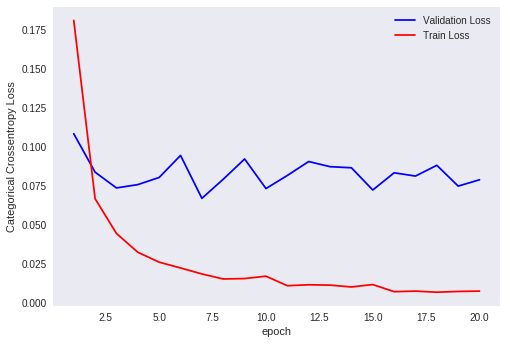

In [0]:
score = model_1_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
pretty_table.add_row(["784-512-BN-256-BN-10",2,score[0],score[1]])
plt_dynamic(x, vy, ty, ax)

**Observation(s)**

Validation loss curve is getting flat as number of epochs increases.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


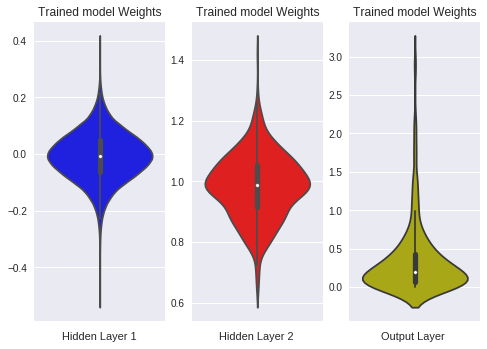

In [0]:
w_after = model_1_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batch Normalization + DropOut
## 784 - 512(Relu) - BN - Dropout - 256(Relu) - BN -Dropout -  10  

In [0]:
# Multilayer perceptron

model_1_batch_drop = Sequential()
model_1_batch_drop.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_1_batch_drop.add(BatchNormalization())
model_1_batch_drop.add(Dropout(0.5))

model_1_batch_drop.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model_1_batch_drop.add(BatchNormalization())
model_1_batch_drop.add(Dropout(0.5))

model_1_batch_drop.add(Dense(output_dim, activation='softmax',kernel_initializer=he_normal(seed=None)))

model_1_batch_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 10)                2570      
Total para

In [0]:
model_1_batch_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1_batch_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.4046 - acc: 0.8788 - val_loss: 0.1361 - val_acc: 0.9570
Epoch 2/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1981 - acc: 0.9386 - val_loss: 0.1037 - val_acc: 0.9663
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1506 - acc: 0.9544 - val_loss: 0.0879 - val_acc: 0.9719
Epoch 4/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1290 - acc: 0.9599 - val_loss: 0.0805 - val_acc: 0.9745
Epoch 5/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.1153 - acc: 0.9632 - val_loss: 0.0777 - val_acc: 0.9763
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1053 - acc: 0.9668 - val_loss: 0.0718 - val_acc: 0.9761
Epoch 7/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0961 - acc: 0.9697 - val_loss: 0.0689 - val_ac

Test score: 0.05091749908538186
Test accuracy: 0.9858


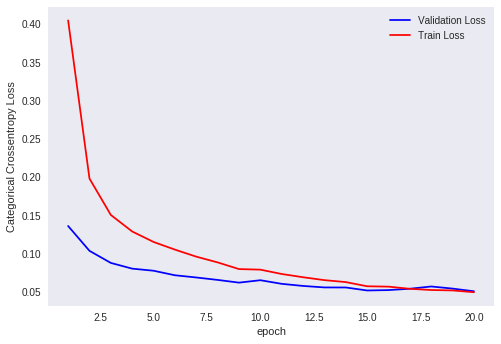

In [0]:
score = model_1_batch_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
pretty_table.add_row(["784-512-BN-Dropout-256-BN-Dropout-10",2,score[0],score[1]])
plt_dynamic(x, vy, ty, ax)

**Observation(s)**

Both train and test loss curves are decreasing and reaching a constant after few epochs

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


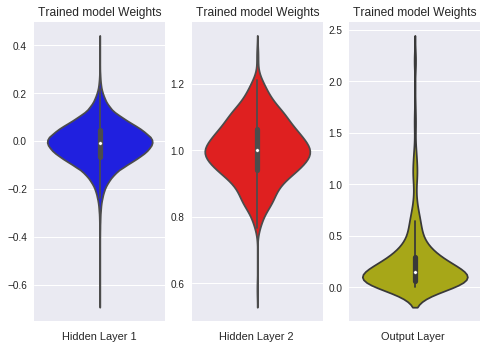

In [0]:
w_after = model_1_batch_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model 2 

# 3 Hidden Layers

# 784 -588- 392 -196- 10

##784 - 588 (Relu) - 392(Relu) - 196(Relu) - 10

In [0]:
# Multilayer perceptron

model_2 = Sequential()
model_2.add(Dense(588, activation='relu', input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_2.add(Dense(392, activation='relu',kernel_initializer=he_normal(seed=None)))
model_2.add(Dense(196, activation='relu',kernel_initializer=he_normal(seed=None)))
model_2.add(Dense(output_dim, activation='softmax',kernel_initializer=he_normal(seed=None)))

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 588)               461580    
_________________________________________________________________
dense_58 (Dense)             (None, 392)               230888    
_________________________________________________________________
dense_59 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_60 (Dense)             (None, 10)                1970      
Total params: 771,466
Trainable params: 771,466
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2073 - acc: 0.9375 - val_loss: 0.0929 - val_acc: 0.9697
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0799 - acc: 0.9747 - val_loss: 0.0724 - val_acc: 0.9796
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0501 - acc: 0.9841 - val_loss: 0.0741 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0395 - acc: 0.9871 - val_loss: 0.0640 - val_acc: 0.9799
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0286 - acc: 0.9905 - val_loss: 0.0669 - val_acc: 0.9808
Epoch 6/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0244 - acc: 0.9919 - val_loss: 0.0725 - val_acc: 0.9810
Epoch 7/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0218 - acc: 0.9925 - val_loss: 0.0980 - val_acc

Test score: 0.11840183419358563
Test accuracy: 0.9771


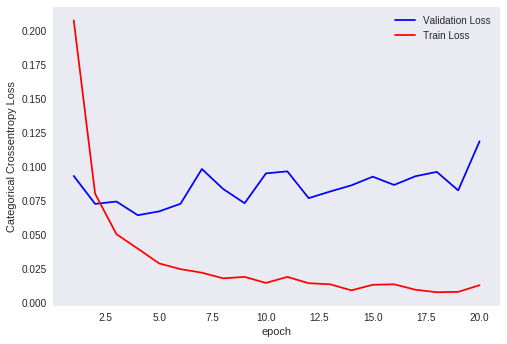

In [0]:
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
pretty_table.add_row(["784-588-392-196-10",3,score[0],score[1]])
plt_dynamic(x, vy, ty, ax)

**Observation(s)**

As epoch number increases the model is overfitting 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


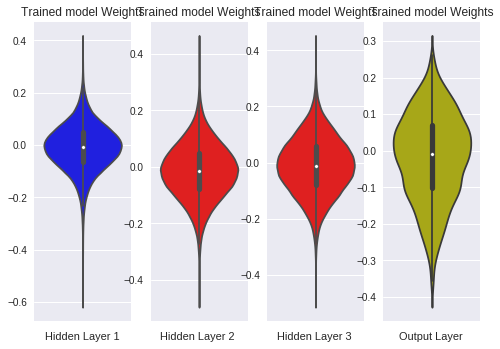

In [0]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batch Normalization 
## 784 - 588(Relu) - BN - 392(Relu)  - 196(Relu) - BN - 10  

In [0]:
# Multilayer perceptron

model_2_batch = Sequential()
model_2_batch.add(Dense(588, activation='relu', input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_2_batch.add(BatchNormalization())

model_2_batch.add(Dense(392, activation='relu',kernel_initializer=he_normal(seed=None)))

model_2_batch.add(Dense(196, activation='relu',kernel_initializer=he_normal(seed=None)))
model_2_batch.add(BatchNormalization())

model_2_batch.add(Dense(output_dim, activation='softmax',kernel_initializer=he_normal(seed=None)))

model_2_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 588)               461580    
_________________________________________________________________
batch_normalization_20 (Batc (None, 588)               2352      
_________________________________________________________________
dense_62 (Dense)             (None, 392)               230888    
_________________________________________________________________
dense_63 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_21 (Batc (None, 196)               784       
_________________________________________________________________
dense_64 (Dense)             (None, 10)                1970      
Total params: 774,602
Trainable params: 773,034
Non-trainable params: 1,568
_________________________________________________________________


In [0]:
model_2_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.1791 - acc: 0.9452 - val_loss: 0.0970 - val_acc: 0.9696
Epoch 2/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0680 - acc: 0.9780 - val_loss: 0.0792 - val_acc: 0.9750
Epoch 3/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0488 - acc: 0.9844 - val_loss: 0.0804 - val_acc: 0.9760
Epoch 4/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0330 - acc: 0.9891 - val_loss: 0.0860 - val_acc: 0.9754
Epoch 5/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0306 - acc: 0.9901 - val_loss: 0.0739 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.0258 - acc: 0.9911 - val_loss: 0.0777 - val_acc: 0.9770
Epoch 7/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0213 - acc: 0.9927 - val_loss: 0.0707 - 

Test score: 0.0648208680796739
Test accuracy: 0.9842


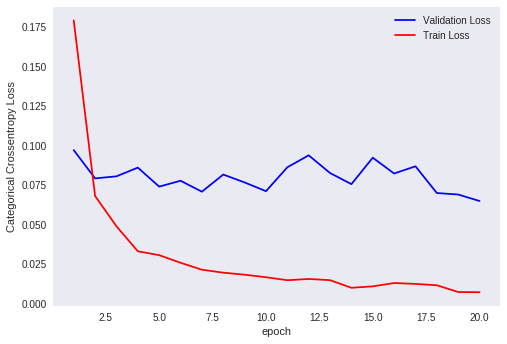

In [0]:
score = model_2_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
pretty_table.add_row(["784-588-BN-392-196-BN-10",3,score[0],score[1]])
plt_dynamic(x, vy, ty, ax)

**Observation(s)**

After 20 epochs , train loss curvie has almost stabilized whereas the vaidation loss curve is still inconsistent 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


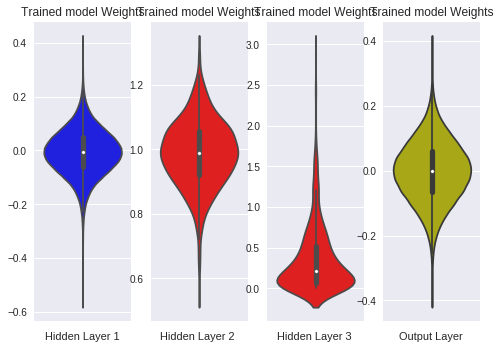

In [0]:
w_after = model_2_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batch Normalization + DropOut
## 784 - 588(Relu) - BN - Dropout - 392(Relu) - Dropout - 196(Relu)- BN -Dropout -  10  

In [0]:
# Multilayer perceptron

model_2_batch_drop = Sequential()
model_2_batch_drop.add(Dense(588, activation='relu', input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_2_batch_drop.add(BatchNormalization())
model_2_batch_drop.add(Dropout(0.5))

model_2_batch_drop.add(Dense(392, activation='relu',kernel_initializer=he_normal(seed=None)))
model_2_batch_drop.add(Dropout(0.5))

model_2_batch_drop.add(Dense(196, activation='relu',kernel_initializer=he_normal(seed=None)))
model_2_batch_drop.add(BatchNormalization())
model_2_batch_drop.add(Dropout(0.5))

model_2_batch_drop.add(Dense(output_dim, activation='softmax',kernel_initializer=he_normal(seed=None)))

model_2_batch_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 588)               461580    
_________________________________________________________________
batch_normalization_22 (Batc (None, 588)               2352      
_________________________________________________________________
dropout_13 (Dropout)         (None, 588)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 392)               230888    
_________________________________________________________________
dropout_14 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 196)               77028     
_________________________________________________________________
batch_normalization_23 (Batc (None, 196)               784       
__________

In [0]:
model_2_batch_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_2_batch_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.5389 - acc: 0.8355 - val_loss: 0.1507 - val_acc: 0.9533
Epoch 2/20
60000/60000 [==============================] - 7s 122us/step - loss: 0.2317 - acc: 0.9307 - val_loss: 0.1215 - val_acc: 0.9623
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1779 - acc: 0.9476 - val_loss: 0.1011 - val_acc: 0.9689
Epoch 4/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1514 - acc: 0.9544 - val_loss: 0.0804 - val_acc: 0.9747
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1308 - acc: 0.9597 - val_loss: 0.0780 - val_acc: 0.9767
Epoch 6/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.1176 - acc: 0.9648 - val_loss: 0.0719 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.1093 - acc: 0.9672 - val_loss: 0.0712 -

Test score: 0.05595745367396739
Test accuracy: 0.9846


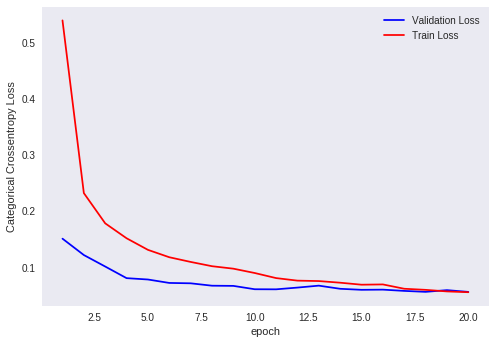

In [0]:
score = model_2_batch_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
pretty_table.add_row(["784-588-BN-Dropout-392-BN-Dropout-196-BN-Dropout-10",3,score[0],score[1]])
plt_dynamic(x, vy, ty, ax)

**Observation(s)**

Both train and test loss curves are decreasing and reaching a constant after few epochs

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


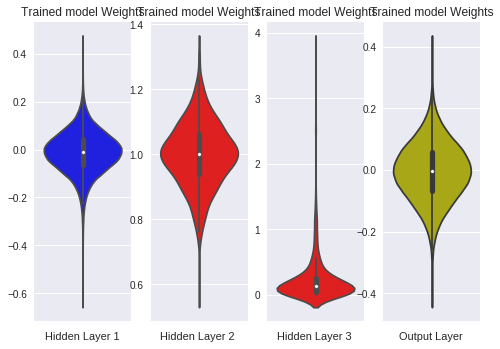

In [0]:
w_after = model_2_batch_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1) 
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')


plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Model 3 

# 5 Hidden Layers

# 784 - 640 - 512 - 384 - 256 - 128 - 10

##784 - 640(Relu) - 512(Relu) - 384(Relu) - 256(Relu) - 128(Relu) - 10

In [0]:
# Multilayer perceptron

model_3 = Sequential()
model_3.add(Dense(640, activation='relu', input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_3.add(Dense(512, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3.add(Dense(384, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3.add(Dense(output_dim, activation='softmax',kernel_initializer=he_normal(seed=None)))

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 640)               502400    
_________________________________________________________________
dense_70 (Dense)             (None, 512)               328192    
_________________________________________________________________
dense_71 (Dense)             (None, 384)               196992    
_________________________________________________________________
dense_72 (Dense)             (None, 256)               98560     
_________________________________________________________________
dense_73 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_74 (Dense)             (None, 10)                1290      
Total params: 1,160,330
Trainable params: 1,160,330
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.2127 - acc: 0.9343 - val_loss: 0.1174 - val_acc: 0.9638
Epoch 2/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0895 - acc: 0.9725 - val_loss: 0.0833 - val_acc: 0.9745
Epoch 3/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0637 - acc: 0.9802 - val_loss: 0.0928 - val_acc: 0.9726
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0487 - acc: 0.9850 - val_loss: 0.0845 - val_acc: 0.9761
Epoch 5/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0405 - acc: 0.9879 - val_loss: 0.0713 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0309 - acc: 0.9902 - val_loss: 0.0992 - val_acc: 0.9730
Epoch 7/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0291 - acc: 0.9912 - val_loss: 0.0999 - val_ac

Test score: 0.08739620532509366
Test accuracy: 0.9811


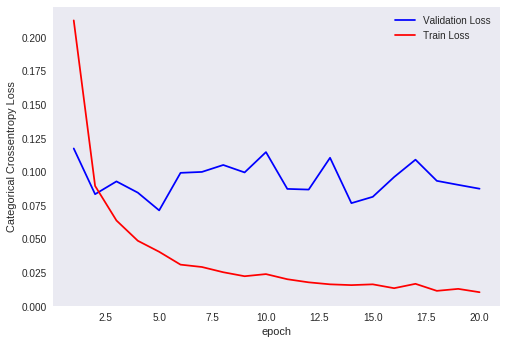

In [0]:
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
pretty_table.add_row(["784-640-512-384-256-128-10",5,score[0],score[1]])
plt_dynamic(x, vy, ty, ax)

**Observation(s)**

After 20 epochs , train loss curvie has almost stabilized whereas the vaidation loss curve is still inconsistent 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


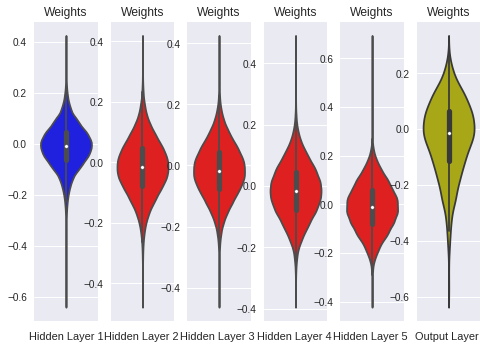

In [0]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batch Normalization 
## 784 - 640(Relu) - BN - 512(Relu)  - 384(Relu) - BN- 256(Relu) - 128(Relu) - BN - 10  

In [0]:
# Multilayer perceptron

model_3_batch = Sequential()
model_3_batch.add(Dense(640, activation='relu', input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_3_batch.add(BatchNormalization())

model_3_batch.add(Dense(512, activation='relu',kernel_initializer=he_normal(seed=None)))

model_3_batch.add(Dense(384, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3_batch.add(BatchNormalization())

model_3_batch.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))

model_3_batch.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3_batch.add(BatchNormalization())

model_3_batch.add(Dense(output_dim, activation='softmax',kernel_initializer=he_normal(seed=None)))

model_3_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 640)               502400    
_________________________________________________________________
batch_normalization_24 (Batc (None, 640)               2560      
_________________________________________________________________
dense_76 (Dense)             (None, 512)               328192    
_________________________________________________________________
dense_77 (Dense)             (None, 384)               196992    
_________________________________________________________________
batch_normalization_25 (Batc (None, 384)               1536      
_________________________________________________________________
dense_78 (Dense)             (None, 256)               98560     
_________________________________________________________________
dense_79 (Dense)             (None, 128)               32896     
__________

In [0]:
model_3_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.1927 - acc: 0.9406 - val_loss: 0.1141 - val_acc: 0.9656
Epoch 2/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0807 - acc: 0.9748 - val_loss: 0.0987 - val_acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0566 - acc: 0.9821 - val_loss: 0.0981 - val_acc: 0.9710
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0460 - acc: 0.9849 - val_loss: 0.0906 - val_acc: 0.9724
Epoch 5/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0383 - acc: 0.9875 - val_loss: 0.0793 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0346 - acc: 0.9884 - val_loss: 0.0767 - val_acc: 0.9781
Epoch 7/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0326 - acc: 0.9889 - val_loss: 0.0823 -

Test score: 0.06471056853984483
Test accuracy: 0.9824


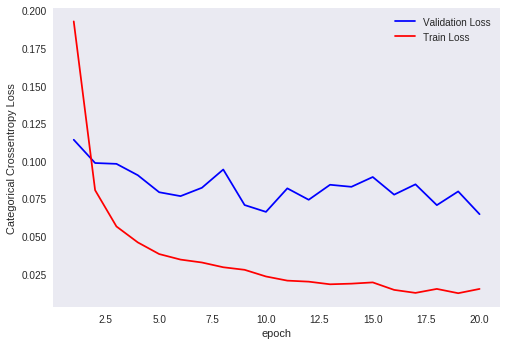

In [0]:
score = model_3_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
pretty_table.add_row(["784-640-BN-512-384-BN-256-128-BN-10",5,score[0],score[1]])
plt_dynamic(x, vy, ty, ax)

**Observation(s)**

Validation loss curve .is slowly decreasing with increase in number of epochs

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


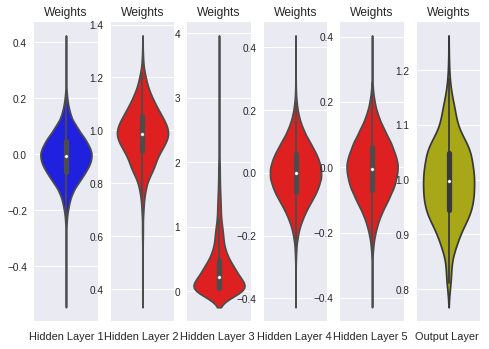

In [0]:
w_after = model_3_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## With Batch Normalization + DropOut
## 784 - 640(Relu) - BN - Dropout - 512(Relu) - Dropout - 384(Relu) - BN - Dropout - 256(Relu) - Dropout - 128(Relu)- BN -Dropout -  10  

In [0]:
# Multilayer perceptron


model_3_batch_drop = Sequential()
model_3_batch_drop.add(Dense(640, activation='relu', input_shape=(input_dim,),kernel_initializer=he_normal(seed=None)))
model_3_batch_drop.add(BatchNormalization())
model_3_batch_drop.add(Dropout(0.5))

model_3_batch_drop.add(Dense(512, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3_batch_drop.add(Dropout(0.5))

model_3_batch_drop.add(Dense(384, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3_batch_drop.add(BatchNormalization())
model_3_batch_drop.add(Dropout(0.5))

model_3_batch_drop.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3_batch_drop.add(Dropout(0.5))

model_3_batch_drop.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))
model_3_batch_drop.add(BatchNormalization())
model_3_batch_drop.add(Dropout(0.5))

model_3_batch_drop.add(Dense(output_dim, activation='softmax',kernel_initializer=he_normal(seed=None)))

model_3_batch_drop.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 640)               502400    
_________________________________________________________________
batch_normalization_27 (Batc (None, 640)               2560      
_________________________________________________________________
dropout_16 (Dropout)         (None, 640)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 512)               328192    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 384)               196992    
_________________________________________________________________
batch_normalization_28 (Batc (None, 384)               1536      
__________

In [0]:
model_3_batch_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_3_batch_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.9395 - acc: 0.7081 - val_loss: 0.2224 - val_acc: 0.9354
Epoch 2/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.3230 - acc: 0.9069 - val_loss: 0.1380 - val_acc: 0.9582
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.2348 - acc: 0.9335 - val_loss: 0.1252 - val_acc: 0.9638
Epoch 4/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.1915 - acc: 0.9460 - val_loss: 0.1037 - val_acc: 0.9708
Epoch 5/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.1686 - acc: 0.9539 - val_loss: 0.0945 - val_acc: 0.9732
Epoch 6/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.1537 - acc: 0.9579 - val_loss: 0.0895 - val_acc: 0.9748
Epoch 7/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.1434 - acc: 0.9605 - val_loss: 0.

Test score: 0.06421527468310669
Test accuracy: 0.9833


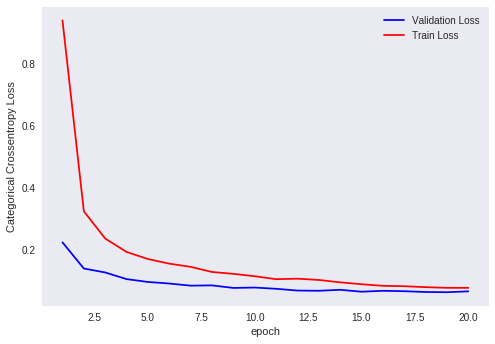

In [0]:
score = model_3_batch_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
pretty_table.add_row(["784-640-BN-Dropout-512-Dropout-384-BN-Dropout-256-Dropout-128-BN-Dropout-10",5,score[0],score[1]])
plt_dynamic(x, vy, ty, ax)

**Observation(s)**

Both train and test loss curves are decreasing and reaching a constant after few epochs

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


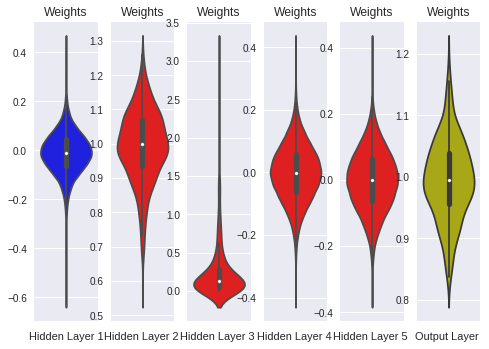

In [0]:
w_after = model_3_batch_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')


plt.subplot(1, 6, 6)
plt.title("Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusion

In [0]:
print("Model - MLP , Activiation- Relu, Optimizer - Adam")
print("BN means Batch Normalization")
print("keep prob = 0.5 (For Dropouts)")
print(pretty_table)

Model - MLP , Activiation- Relu, Optimizer - Adam
BN means Batch Normalization
keep prob = 0.5 (For Dropouts)
+-----------------------------------------------------------------------------+---------------+---------------------+---------------+
|                                 Architecture                                | Hidden Layers |      Test Loss      | Test Accuracy |
+-----------------------------------------------------------------------------+---------------+---------------------+---------------+
|                                784-512-256-10                               |       2       | 0.09803795478036292 |     0.9819    |
|                             784-512-BN-256-BN-10                            |       2       | 0.07881053302125401 |     0.9822    |
|                     784-512-BN-Dropout-256-BN-Dropout-10                    |       2       | 0.05091749908538186 |     0.9858    |
|                              784-588-392-196-10                             |       

**Conclusion**

In all the 3 architectures,


1.   Models without Batch Normalization and dropout, are slightly overfitting 
2.   Adding  Batch Normalization to Models has slightly imporved their performance 
3.   Models with Batch Normalization and dropouts have performed well 

